In [1]:
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

#### p값에 의해 L1, L2가 정해짐

<img src="image/l1.svg"> <br>

## p = 1  L1 Norm
## p = 2  L2 Norm

https://en.wikipedia.org/wiki/Norm_(mathematics)

## L1

In [10]:
np.random.seed(20)
data = np.random.randint(-5,6,size=(2,2))
data
df_L1 = pd.DataFrame(data)
df_L1

,0,1
0,-2,5
1,5,4


In [11]:
# ord =1이면 L1
linalg.norm(df_L1,ord=1, axis=1) # row별 절대값의 합

array([7., 9.])

## L2

In [8]:
np.random.seed(20)
data = np.random.randint(1,10,size=(3,2))
data
df_L2 = pd.DataFrame(data)
df_L2

,0,1
0,4,5
1,7,8
2,3,1


In [13]:
# ord = 2 이면 L2
# np.sqrt(4**2 + 5**2) = 6.403

linalg.norm(df_L2, ord=2, axis=1) # row별 절대값의 합

array([ 6.40312424, 10.63014581,  3.16227766])

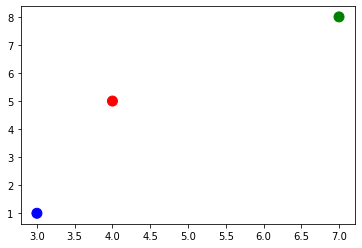

In [17]:
# L2는 빗변의 길이

plt.scatter(df_L2[0],df_L2[1], s=100, c=['r','g','b'])
plt.show()

## cost

In [38]:
x_data = np.array([1,2,3])
y_data = np.array([1,2,3])

In [39]:
w  = 0
hy = w*x_data
n  = len(x_data)

# (예측값 - 실제값) ** 2 제곱의합
loss = np.sum((hy-y_data) ** 2)/n
loss

4.666666666666667

In [40]:
# L2 norm
def cost(x,y,w):
    hy = w* x
    n = len(x)
    loss = np.sum((hy-y) ** 2)/n
    return loss


print(cost(x_data, y_data,0))

4.666666666666667


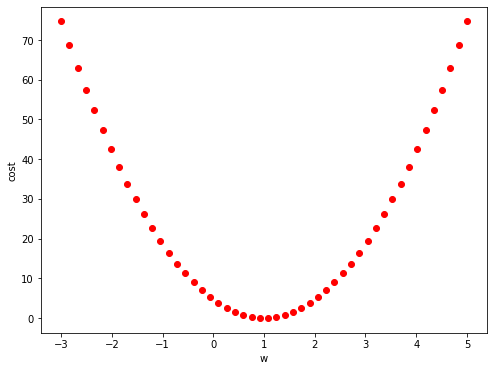

In [44]:
plt.figure(figsize=(8,6))
plt.xlabel('w')
plt.ylabel('cost')

for w in np.linspace(-3,5,50):
    c  = cost(x_data, y_data,w)
    plt.plot(w,c,'ro')
plt.show()

In [46]:
# a값이 높아질수록 w는 0에 가까워짐 (왼쪽으로 치우침)
# ridge (L2 규제)

def cost_l2norm(x,y,w, a):
    hy = w* x
    n = len(x)
    loss = np.sum((hy-y) ** 2)/n + a*(w**2) # ridge
    return loss

In [47]:
import math

In [48]:
# 절대값
math.fabs(-2)

2.0

In [76]:
# lasso (L1 규제)

def cost_l1norm(x,y,w, a):
    hy = w* x
    n = len(x)
    loss = np.sum((hy-y) ** 2)/n + a * math.fabs(w) # lasso
    return loss

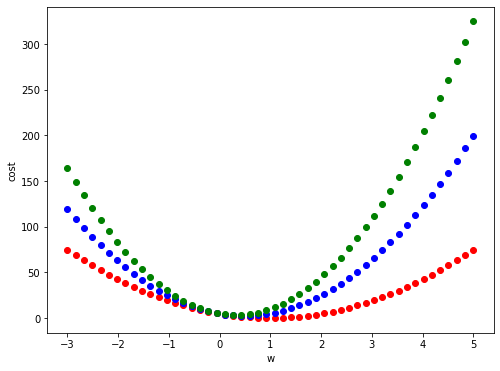

In [67]:
plt.figure(figsize=(8,6))
plt.xlabel('w')
plt.ylabel('cost')

for w in np.linspace(-3,5,50):
    c  = cost_l2norm(x_data, y_data,w, a=0) 
    plt.plot(w,c,'ro')

    c  = cost_l2norm(x_data, y_data,w, a=5) 
    plt.plot(w,c,'bo')

    c  = cost_l2norm(x_data, y_data,w, a=10) 
    plt.plot(w,c,'go')
plt.show()

In [ ]:
## 결론 : a가 커질수록 0에 근접해진다.
#   기울기가 0이라는 의미는 해당 특성데이터를 예측시 무시하기

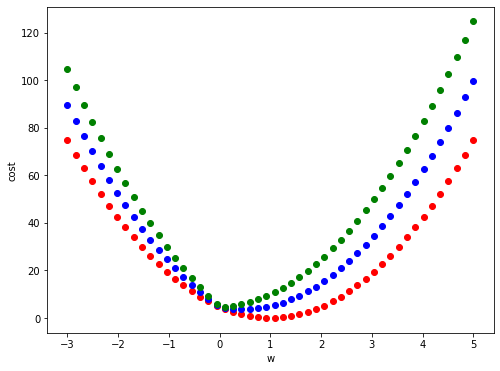

In [68]:
# L1
plt.figure(figsize=(8,6))
plt.xlabel('w')
plt.ylabel('cost')

for w in np.linspace(-3,5,50):
    c  = cost_l1norm(x_data, y_data,w, a=0) 
    plt.plot(w,c,'ro')

    c  = cost_l1norm(x_data, y_data,w, a=5) 
    plt.plot(w,c,'bo')

    c  = cost_l1norm(x_data, y_data,w, a=10) 
    plt.plot(w,c,'go')
plt.show()